In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics.pairwise import euclidean_distances

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [2]:
data = pd.read_csv('Country-data.csv')

In [3]:
data.head(2)

country  child_mort  exports  health  imports  income  inflation  \
0  Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
1      Albania        16.6     28.0    6.55     48.6    9930       4.49   

   life_expec  total_fer  gdpp  
0        56.2       5.82   553  
1        76.3       1.65  4090

In [4]:
data.set_index('country',inplace=True) # we set the country column as index here 

In [5]:
data.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

### Lets do some data exploration 
DATA EXPLORATION

In [7]:
print('No of Countries:',data.shape[0])

No of Countries: 167


In [8]:
# 5 point summary 
data.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

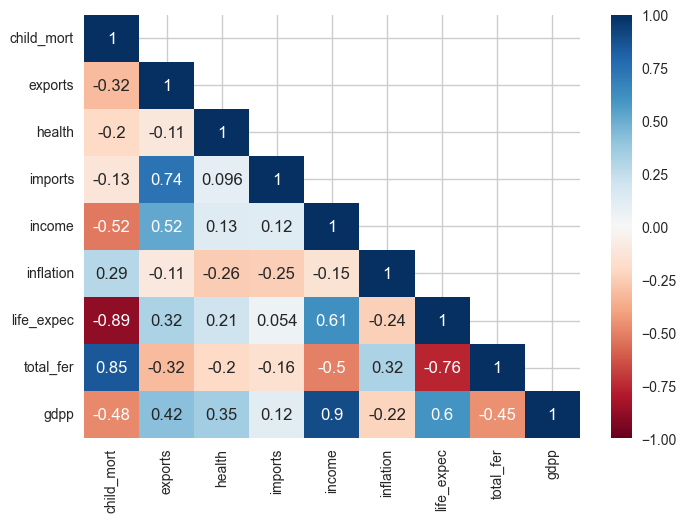

In [9]:
# correlaion plot 
sns.heatmap(data.corr(),vmin=-1,cmap='RdBu',annot=True,mask=np.triu(data.corr(),k=1))
plt.show()

In [10]:
# lets do Univarient analysis


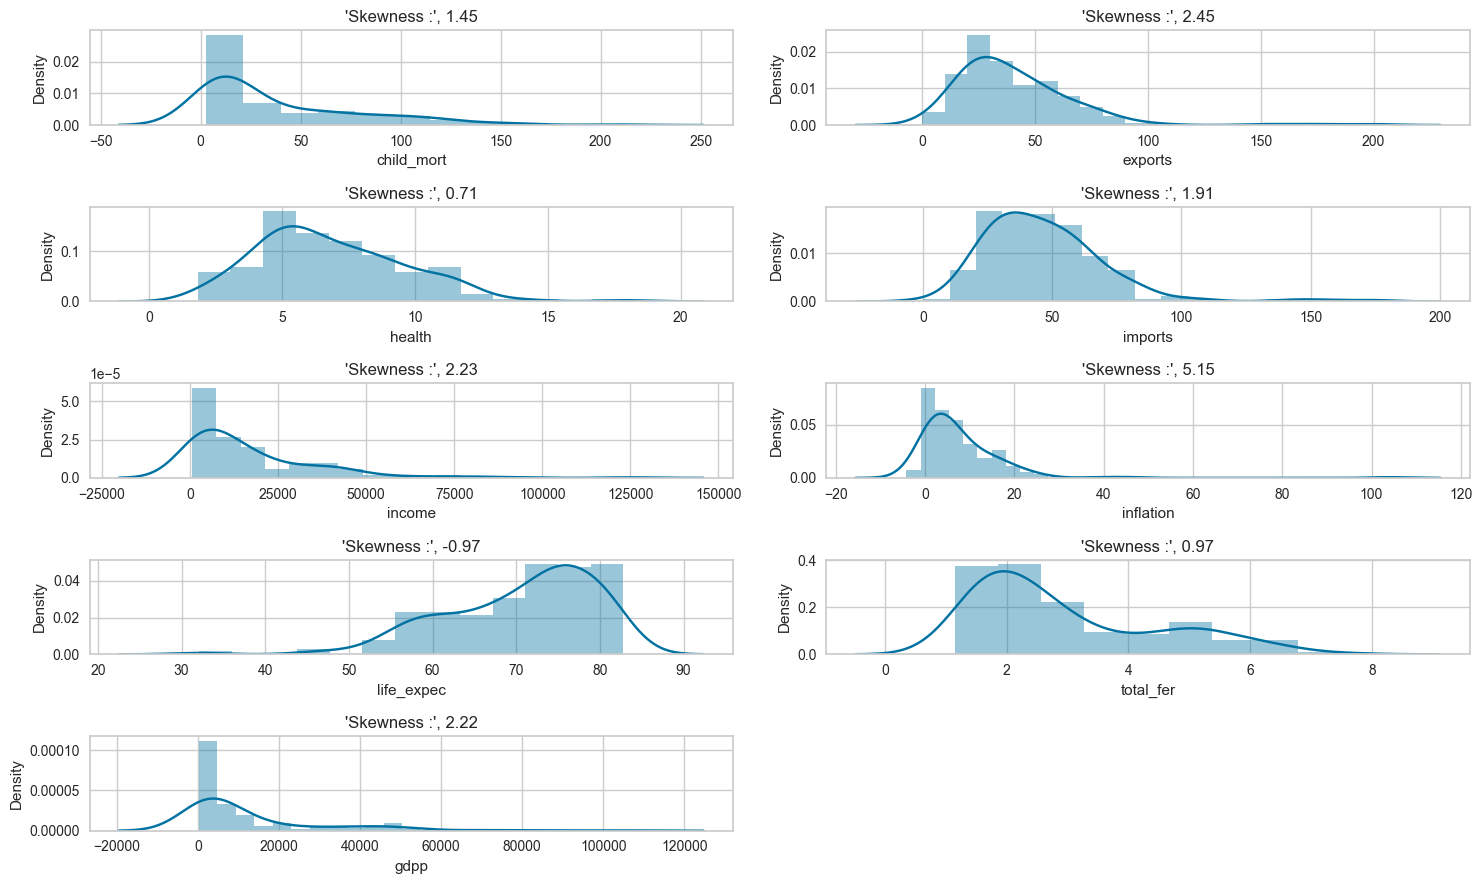

In [11]:
t = 1
plt.figure(figsize=(15,9))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.distplot(data[i])
    plt.title(f"'Skewness :', {round(data[i].skew(),2)}")
    t+=1

plt.tight_layout()
plt.show()
    
    

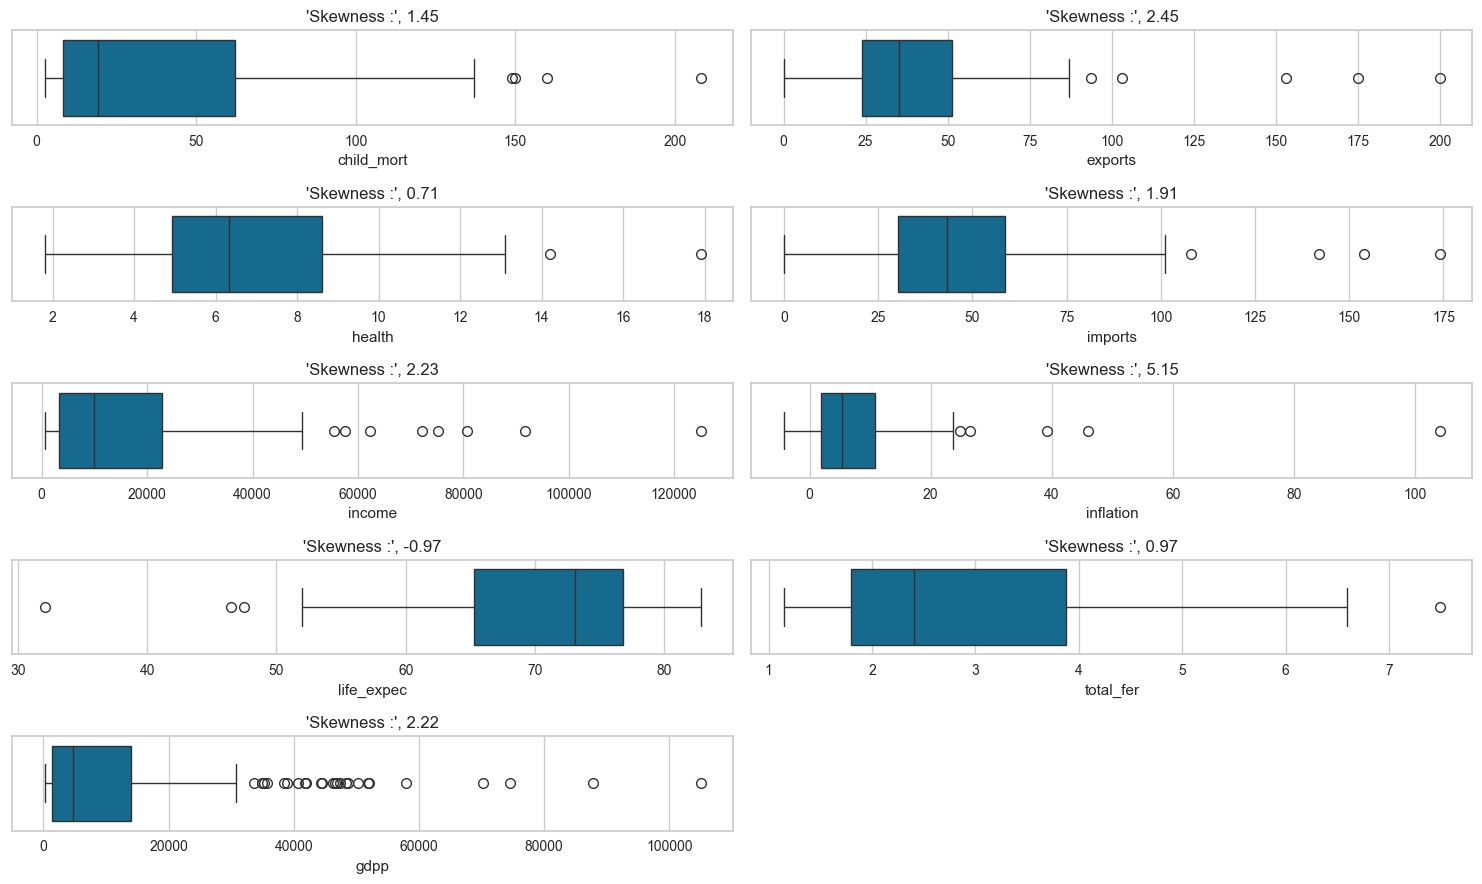

In [12]:
t = 1
plt.figure(figsize=(15,9))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f"'Skewness :', {round(data[i].skew(),2)}")
    t+=1

plt.tight_layout()
plt.show()

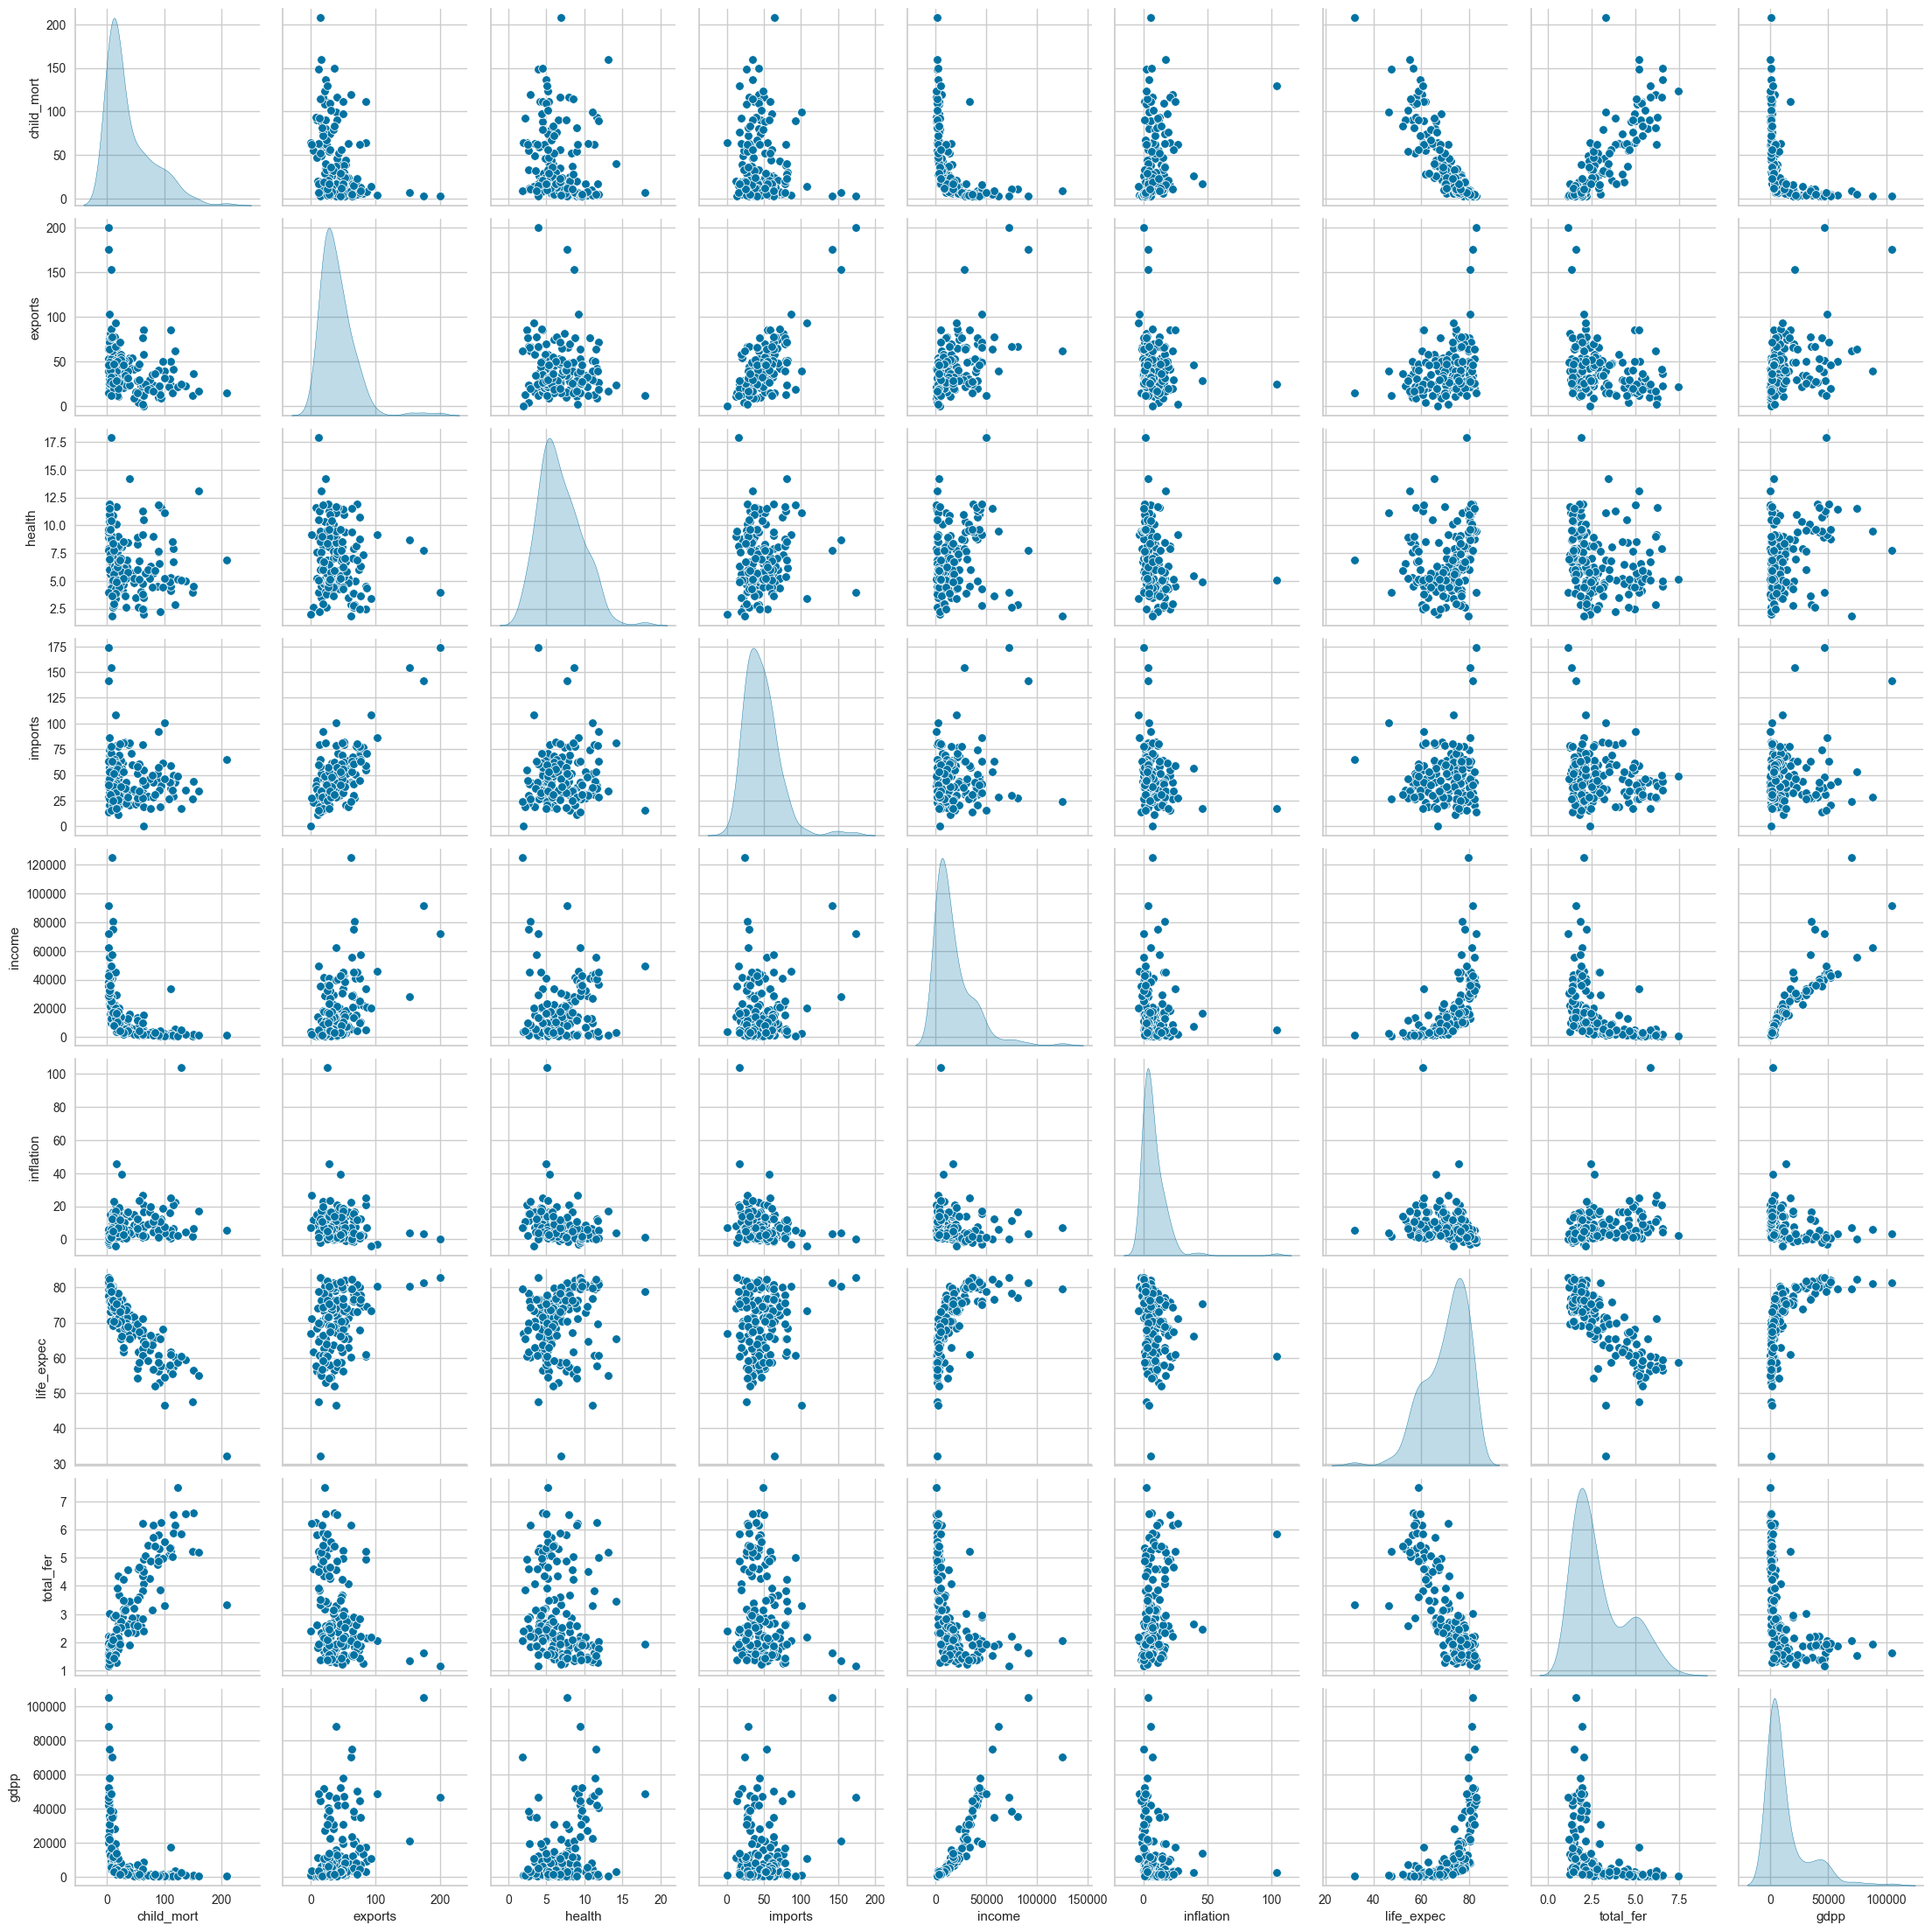

In [13]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [14]:
# lets clean the data 
# check for missing values 
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [15]:
#  Their are no missing values in the data 

In [16]:
## Checking for dulpicated rows
data.duplicated().sum()

0

In [17]:
# Their is no duplicate in the data 

#### There are no missing values and duplicated rows in the data

In [19]:
# Capping the outliers (For treating the outliers)
for i in data.columns:
    q1,q3= np.percentile(data[i],[75,25])
    iqr = q3-q1
    ul,ll = q3-1.5*iqr,q1+1.5*iqr
    data[i] = data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

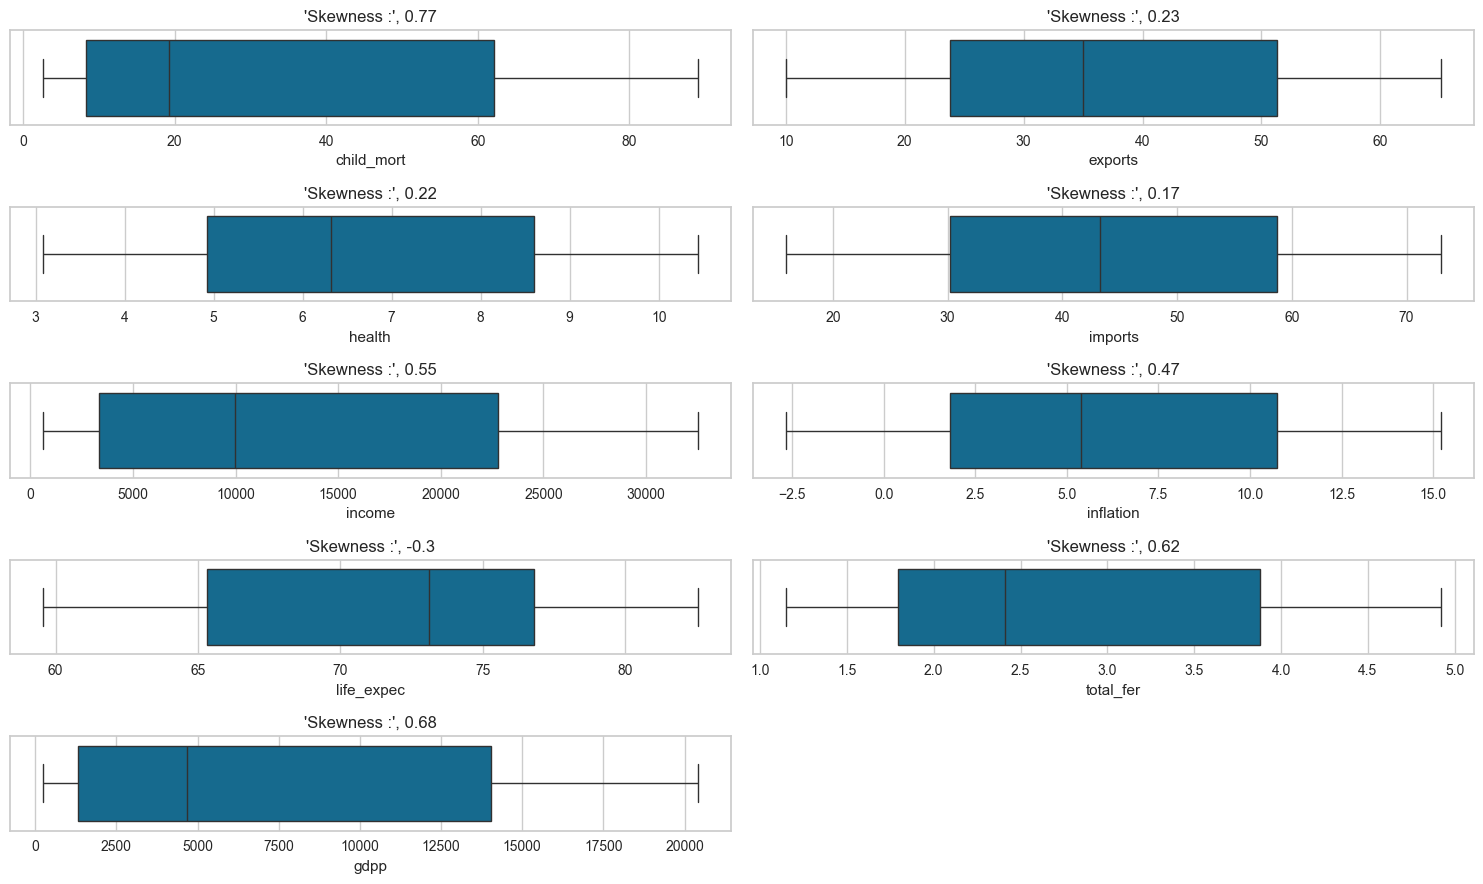

In [20]:
t = 1
plt.figure(figsize=(15,9))
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i)
    plt.title(f"'Skewness :', {round(data[i].skew(),2)}")
    t+=1

plt.tight_layout()
plt.show()

In [21]:
# lets scale the data as well 

In [22]:
sc = StandardScaler()
data_s = sc.fit_transform(data)
data_s = pd.DataFrame(data_s,columns=data.columns,index=data.index)
data_s.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.774151 -1.593955  0.387306  0.020227 -1.076244   
Albania               -0.566786 -0.562381 -0.057959  0.237020 -0.350349   
Algeria               -0.220938  0.034468 -1.086822 -0.770777 -0.091226   
Angola                 1.774151  1.406073 -1.558024 -0.096959 -0.701955   
Antigua and Barbuda   -0.770416  0.441932 -0.282752  0.840527  0.449706   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.564225   -1.569056   1.653074 -0.998315  
Albania              -0.359036    0.681793  -0.923793 -0.532388  
Algeria               1.642295    0.708668   0.052621 -0.483648  
Angola                1.642295   -1.495148   1.653074 -0.606156  
Antigua and Barbuda  -0.927913    0.748982  -0.545826  0.535939

### PCA (Principle Component Analysis)

***for better collection and better visulalization***

In [25]:
pca = PCA(n_components=9)

In [26]:
pca.fit(data_s)

PCA(n_components=9)

In [27]:
# Lets use percentage of explained varience to decide no of PCs we want 
# Lets take 95% variance so we take 5 pc

In [28]:
pca.explained_variance_ratio_.cumsum()

array([0.52163539, 0.68366283, 0.82087515, 0.89488335, 0.95590314,
       0.97454488, 0.98985605, 0.99813982, 1.        ])

In [29]:
pca_final = PCA(n_components=5)
pca_data = pca_final.fit_transform(data_s)

In [30]:
pca_data = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data_s.index)

In [31]:
pca_data

PC1       PC2       PC3       PC4       PC5
country                                                              
Afghanistan         -3.351554 -0.470327  1.053620  0.717732  0.124796
Albania              0.493682 -0.153624  0.382834 -1.374362  0.406617
Algeria             -0.483493 -0.556919 -1.900999 -0.465158  0.650247
Angola              -2.913556  1.378140 -1.925211  1.260306 -0.373051
Antigua and Barbuda  1.596172  0.762342  0.178503 -0.526069 -0.455766
...                       ...       ...       ...       ...       ...
Vanuatu             -1.088436  1.211063  0.319118 -0.550117 -0.540535
Venezuela            0.203461 -1.739514 -1.941933 -0.078843  0.446398
Vietnam              0.094110  2.174685 -0.480508 -0.467646  1.741684
Yemen               -2.444644 -0.405790 -1.009913  0.332954  0.495139
Zambia              -3.195744 -0.147747 -0.681912  1.100162  0.118001

[167 rows x 5 columns]

## CLustering 


In [33]:
# lets identify the value of k 

In [34]:
kelbow = KElbowVisualizer(KMeans(),k=10)

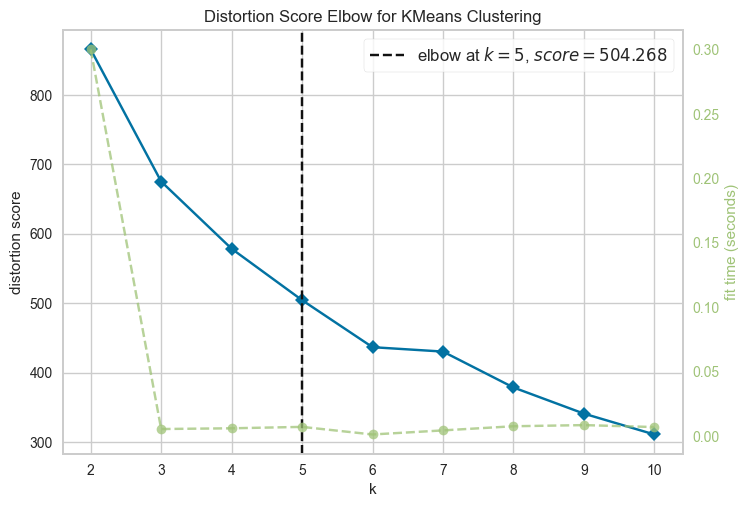

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
kelbow.fit(pca_data)
kelbow.show()

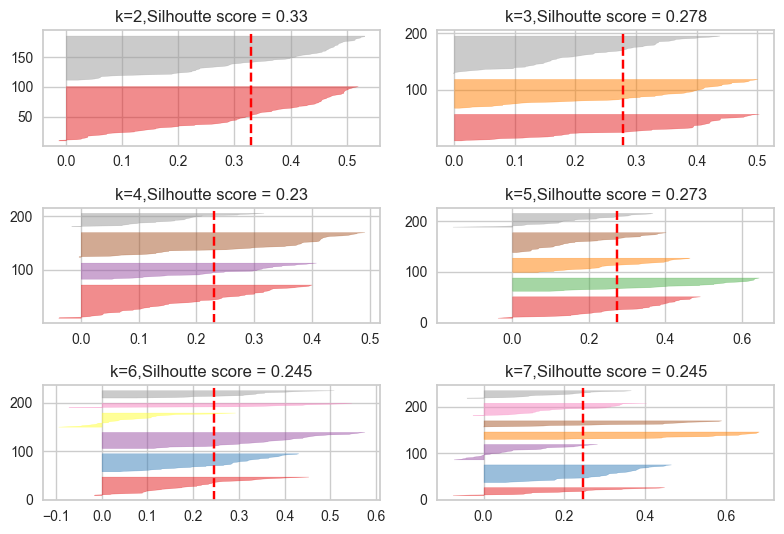

In [36]:
#  lets do sillhouete Visualizers 
t=1
plt.figure(figure=(10,10))
for i in range(2,8):
    plt.subplot(3,2,t)
    model =KMeans(n_clusters=i)
    sill_vizu = SilhouetteVisualizer(model)
    sill_vizu.fit(pca_data)
    plt.title(f"k={i},Silhoutte score = {round(sill_vizu.silhouette_score_,3)}")
    t+=1
plt.tight_layout()    
plt.show()

***We CAN GO WITH  K= 3***

Reason:
* Although there is no outliers in k=2 but some significant clusters can be created with k=3
* With k=3 we will one more cluster with approxmately same silhoutte score ~0.316


In [38]:
kmeans = KMeans(n_clusters=3,random_state=1)
kmean_label = kmeans.fit_predict(pca_data)

In [39]:
##  Show the DENSITY 
pd.Series(kmean_label).value_counts(normalize=True)*100

0    37.125749
1    35.329341
2    27.544910
Name: proportion, dtype: float64

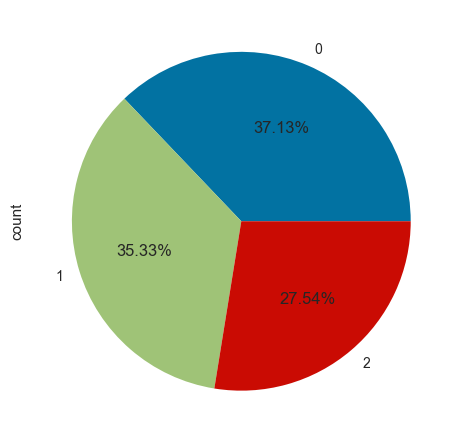

In [40]:

pd.Series(kmean_label).value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

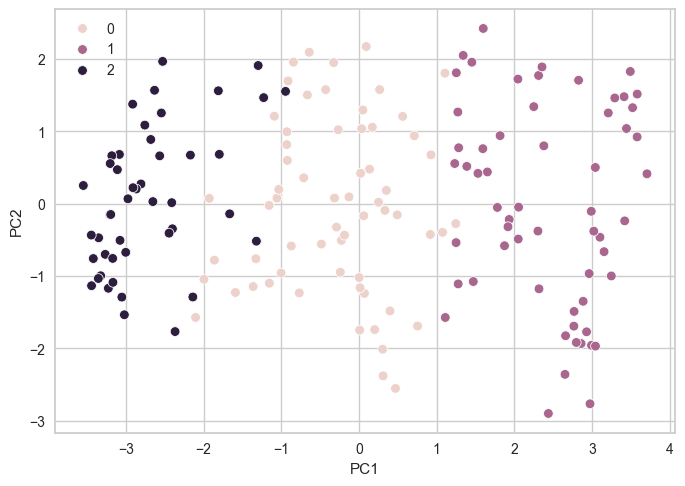

In [41]:
# Visualize the cluster 
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=kmean_label)
plt.show()

In [42]:
# we can seperate the data by PC1 more comfortebly

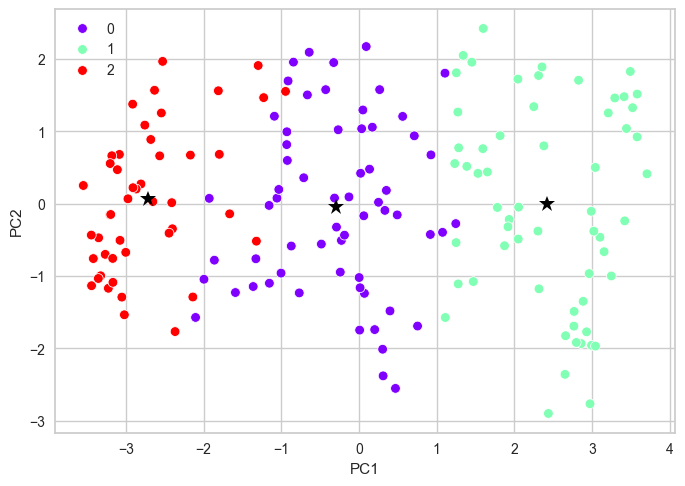

In [43]:
centroid =kmeans.cluster_centers_
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=kmean_label,palette= 'rainbow')
for i in range(3):
    plt.plot(centroid[i][0],centroid[i][1],marker='*',color='Black',ms=12)
plt.show()

### Aggloromative clustering 

In [45]:
dist_mat = euclidean_distances(pca_data)
link_mat = linkage(pca_data,method='ward')

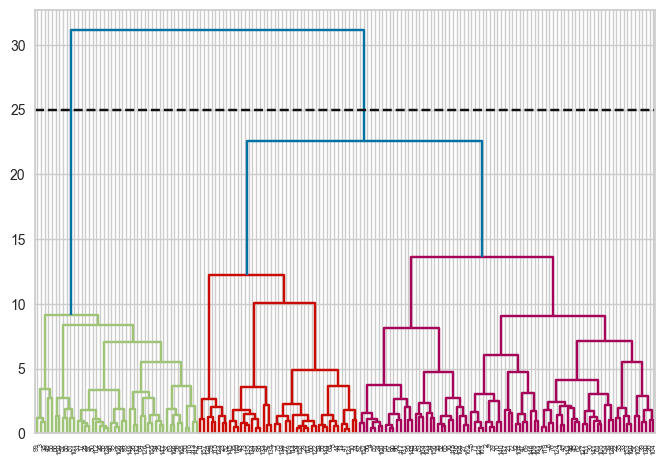

In [46]:
dendrogram(link_mat)
plt.axhline(y=25,ls='--',color='k')
plt.show()

### We can go with 'wards linkage' Method with k = 2

In [48]:
agglo = AgglomerativeClustering(n_clusters=2)

In [49]:
agglo_labels = agglo.fit_predict(pca_data)
print('Sillhouete Scores:', round(silhouette_score(pca_data,agglo_labels),3))

Sillhouete Scores: 0.316


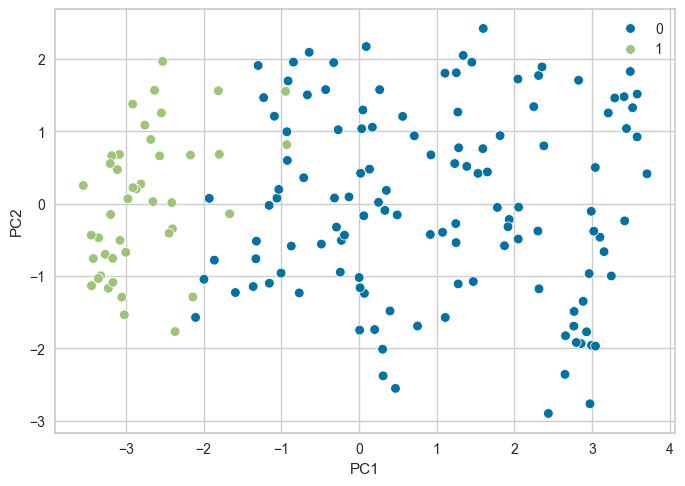

In [50]:
sns.scatterplot(x=pca_data['PC1'],y=pca_data['PC2'],hue=agglo_labels)
plt.show()

# Final Model
### We need to decide the final model 

***So both the model gives apaprox same Sillhoeutte Score same score K-Means cluster gives k=3 and Aggloromative gives k=2. We need to decide which clustering model we should go with.Lets go with K-Means  aggloromative is better for Hierarchical data, While data has no such Hierarchy***

In [52]:
data['label'] = kmean_label 

## Bussiness Interpration 

In [54]:
data.groupby(by='label').mean()

child_mort    exports    health    imports        income  inflation  \
label                                                                        
0       27.003226  34.518145  6.010000  43.583468   9272.419355   7.778726   
1        7.216949  48.332627  7.740000  47.616525  27007.288136   3.118136   
2       78.274457  28.711957  6.238261  41.936957   3491.206522   8.805326   

       life_expec  total_fer          gdpp  
label                                       
0       71.400000   2.430000   4431.806452  
1       78.494915   1.822034  17036.949153  
2       61.669565   4.637174   1695.913043

## Inference 
* 0- Has lowest Child_mort than 2 and 1 has the highest child_mort.
* % of GdP in exports is the Highest for 0 and Lowest for 1,while 2 has the average exports.
* Health index for 0 is clearly better than 1 and 2 both.
* __________________________________________________________
* ___________________________________________________________

In [56]:
data['label'] = data['label'].map({0 : 'Developed',1:'Under_Developed',2:'Developing'})

In [57]:
## Lets Visualiaze these Classes

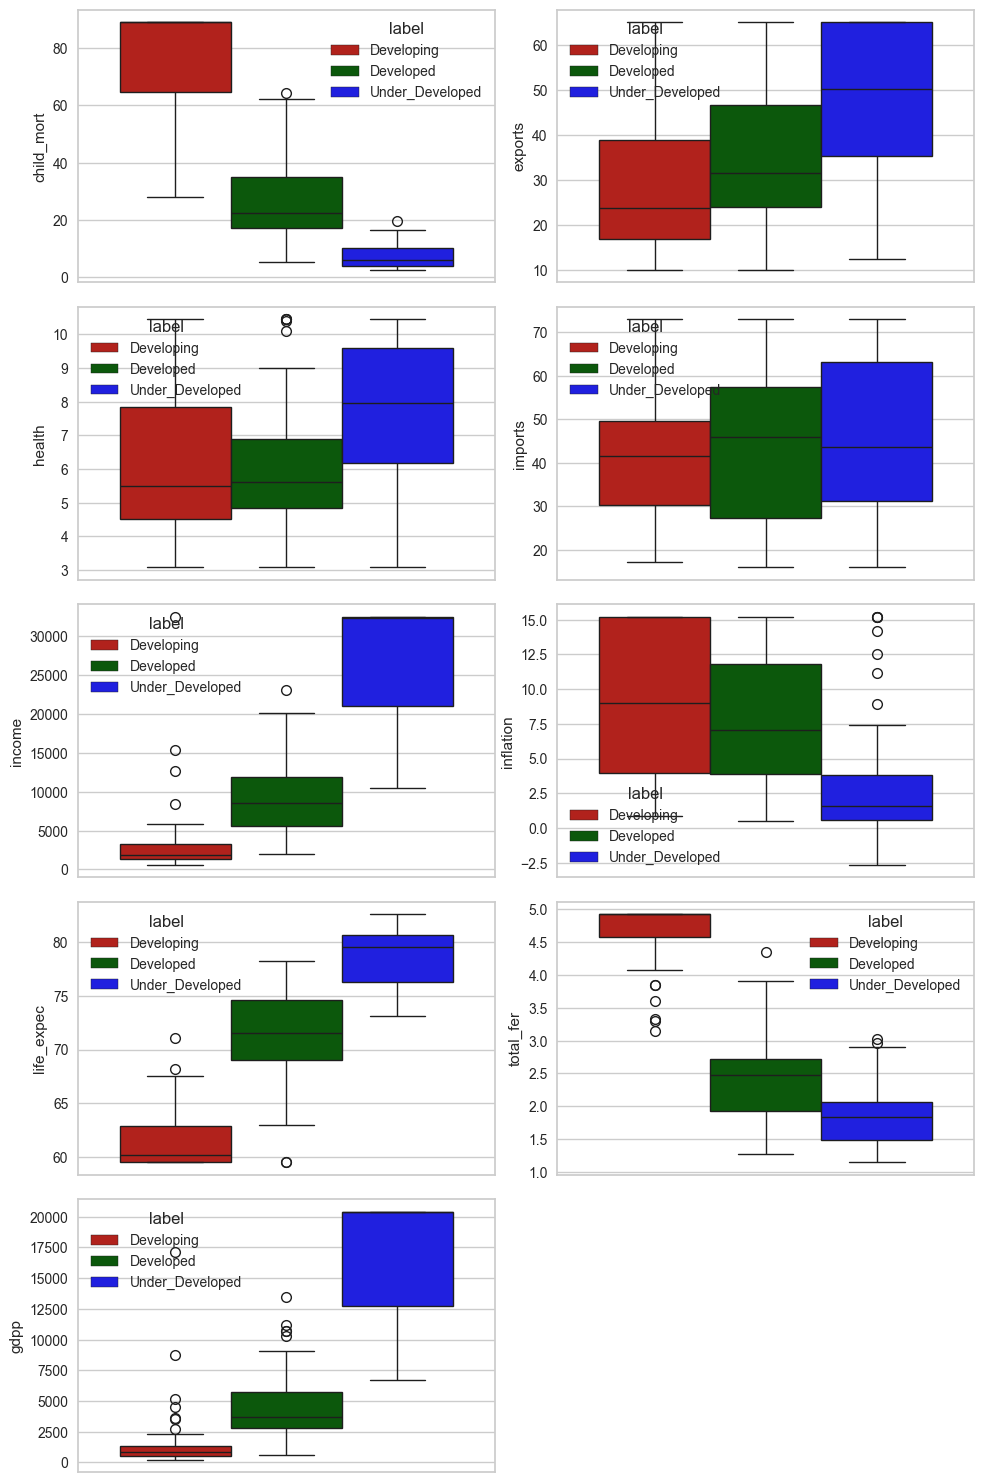

In [58]:
t=1
plt.figure(figsize=(10,15))
for i in data.columns:
    if i!='label':
        plt.subplot(5,2,t)
        sns.boxplot(data, y=i , hue='label',palette=['r','darkgreen','blue'])
        t+=1
plt.tight_layout()
plt.show()

In [59]:
# these charts are for the bussiness interpretation we have to write inferences 

In [60]:
# list of the countries in both the classes
data[data['label']=='Under_Developed'].index

Index(['Antigua and Barbuda', 'Australia', 'Austria', 'Bahamas', 'Bahrain',
       'Barbados', 'Belgium', 'Brunei', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives',
       'Malta', 'Mauritius', 'Montenegro', 'Netherlands', 'New Zealand',
       'Norway', 'Oman', 'Panama', 'Poland', 'Portugal', 'Qatar',
       'Saudi Arabia', 'Seychelles', 'Singapore', 'Slovak Republic',
       'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay'],
      dtype='object', name='country')

In [61]:
data[data['label']=='Developed'].index

Index(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Cambodia',
       'Cape Verde', 'China', 'Colombia', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
       'Guyana', 'India', 'Indonesia', 'Iran', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kyrgyz Republic', 'Macedonia, FYR',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Morocco', 'Myanmar',
       'Nepal', 'Paraguay', 'Peru', 'Philippines', 'Romania', 'Russia',
       'Samoa', 'Serbia', 'South Africa', 'Sri Lanka',
       'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
       'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam'],
      dtype='object', name='country')

In [62]:
data[data['label']=='Developing'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea', 'Eritrea', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Sudan',
       'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

## World Map

In [80]:
import plotly.express as px 

In [74]:
# First create a data of Country and label
world_data = pd.DataFrame({'Label':data['label']})
world_data.reset_index(inplace=True)
world_data.head()

country            Label
0          Afghanistan       Developing
1              Albania        Developed
2              Algeria        Developed
3               Angola       Developing
4  Antigua and Barbuda  Under_Developed

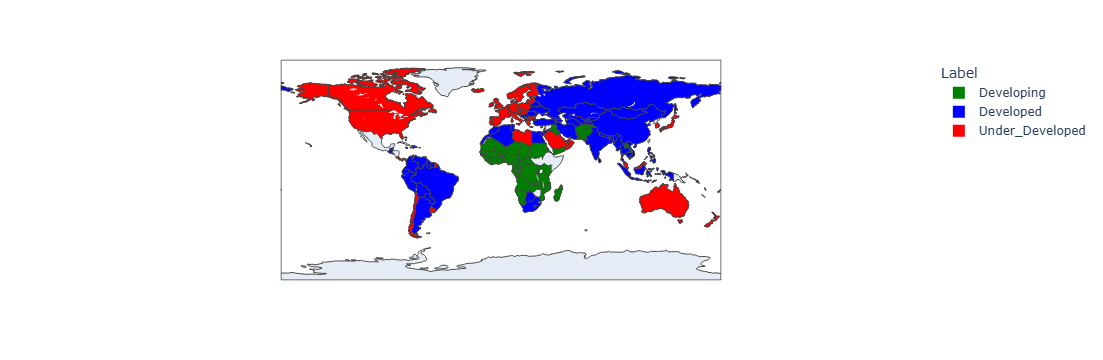

In [88]:
fig = px.choropleth(data_frame=world_data,
                    locationmode='country names',
                    locations='country',
                    color=world_data['Label'],
             color_discrete_map={'Developed':'blue',
                                  'Under_Developed':'red',
                                  'Developing':'green'})
fig.show()